<div align="center">

## "Causal Impact of Job Training on Earnings: A Randomized Experimental Evaluation with ANCOVA and Regression Adjustment"

</div>

<div align="center">

### by Rob Boswell

</div>

<div align="center">

### Feb. 2026

</div>

**Source:**
https://users.nber.org/~rdehejia/data/.nswdata2.html

**Data from:**
- "Causal Effects in Non-Experimental Studies: Reevaluating the Evaluation of Training Programs," Journal of the American Statistical Association, Vol. 94, No. 448 (December 1999), pp. 1053-1062.
- "Propensity Score Matching Methods for Non-Experimental Causal Studies," Review of Economics and Statistics, Vol. 84, (February 2002), pp. 151-161.

**Note:** The data I will be using below is truly randomized. Propensity score-matching was used by the authors of these articles, Rajeev H. Dehejia and Sadek Wahba, on this data I will be using to revise the control group.

RE74 refers to real earnings 24 months before training.

RE75 refers to real earnings 12 months before training.

RE78 refers to real earnings during 1978, after training had already concluded.

In [2]:
import os
os.getcwd()

'C:\\Users\\rsb84'

In [3]:
os.chdir("C://Users/rsb84/Downloads/lalonde")

In [4]:
import pandas as pd
df_control=pd.read_csv("nswre74_control.csv", sep = None)
df_treated=pd.read_csv("nswre74_treated.csv", sep = None)

C:\Users\rsb84\AppData\Local\Temp\ipykernel_60964\2330761546.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_control=pd.read_csv("nswre74_control.csv", sep = None)
C:\Users\rsb84\AppData\Local\Temp\ipykernel_60964\2330761546.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_treated=pd.read_csv("nswre74_treated.csv", sep = None)


In [5]:
df_control.head(10)

,﻿treatment_indicator,age,education,Black,Hispanic,married,nodegree,RE74,RE75,RE78
0,0,23,10,1,0,0,1,0.0,0.0,0.000
1,0,26,12,0,0,0,0,0.0,0.0,12383.680
2,0,22,9,1,0,0,1,0.0,0.0,0.000
3,0,18,9,1,0,0,1,0.0,0.0,10740.080
4,0,45,11,1,0,0,1,0.0,0.0,11796.470
5,0,18,9,1,0,0,1,0.0,0.0,9227.052
6,0,24,8,0,0,0,1,0.0,0.0,10569.270
7,0,34,11,1,0,1,1,0.0,0.0,6040.335
8,0,24,4,0,1,0,1,0.0,0.0,3880.833
9,0,36,10,1,0,0,1,0.0,0.0,0.000


In [6]:
df_treated.head(10)

,﻿treatment_indicator,age,education,Black,Hispanic,married,nodegree,RE74,RE75,RE78
0,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,1,33,8,1,0,0,1,0.0,0.0,289.7899
5,1,22,9,1,0,0,1,0.0,0.0,4056.4940
6,1,23,12,1,0,0,0,0.0,0.0,0.0000
7,1,32,11,1,0,0,1,0.0,0.0,8472.1580
8,1,22,16,1,0,0,0,0.0,0.0,2164.0220
9,1,33,12,0,0,1,0,0.0,0.0,12418.0700


In [7]:
df_control.shape

(260, 10)

In [8]:
df_treated.shape

(185, 10)

My actual sample sizes:

Treatment: 185

Control: 260

This is fine that they are not equal in size.

In [9]:
# Convert categorical variables to category dtype
df_control['Black'] = df_control['Black'].astype('category')
df_control['Hispanic'] = df_control['Hispanic'].astype('category')
df_control['married'] = df_control['married'].astype('category')
df_control['nodegree'] = df_control['nodegree'].astype('category')

# Keep as numeric (continuous)
df_control['RE74'] = df_control['RE74'].astype(float)
df_control['RE75'] = df_control['RE75'].astype(float)
df_control['RE78'] = df_control['RE78'].astype(float)

# Verify
print("Variable types for df_control:")
print(df_control.dtypes)

Variable types for df_control:
﻿treatment_indicator       int64
age                        int64
education                  int64
Black                   category
Hispanic                category
married                 category
nodegree                category
RE74                     float64
RE75                     float64
RE78                     float64
dtype: object


In [10]:
# Convert categorical variables to category dtype
df_treated['Black'] = df_treated['Black'].astype('category')
df_treated['Hispanic'] = df_treated['Hispanic'].astype('category')
df_treated['married'] = df_treated['married'].astype('category')
df_treated['nodegree'] = df_treated['nodegree'].astype('category')

# Keep as numeric (continuous)
df_treated['RE74'] = df_treated['RE74'].astype(float)
df_treated['RE75'] = df_treated['RE75'].astype(float)
df_treated['RE78'] = df_treated['RE78'].astype(float)

# Verify
print("Variable types for df_treated:")
print(df_treated.dtypes)

Variable types for df_treated:
﻿treatment_indicator       int64
age                        int64
education                  int64
Black                   category
Hispanic                category
married                 category
nodegree                category
RE74                     float64
RE75                     float64
RE78                     float64
dtype: object


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

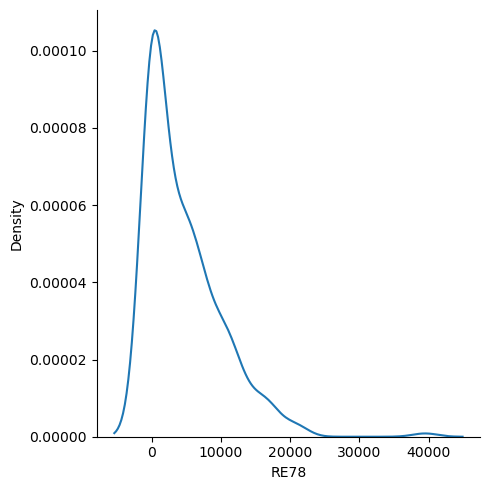

In [12]:
sns.displot(data=df_control, x="RE78", kind="kde")
plt.show()

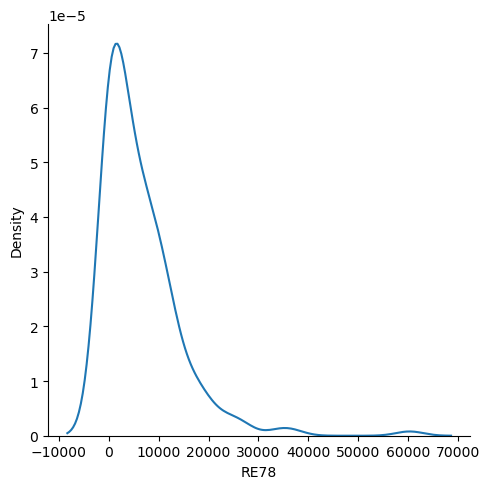

In [13]:
sns.displot(data=df_treated, x="RE78", kind="kde")
plt.show()

In [14]:
from scipy.stats import anderson
result = anderson(df_control["RE78"])

print(round(result.statistic, 4))
print(result.significance_level)
print(result.critical_values)


13.7453
[15.  10.   5.   2.5  1. ]
[0.567 0.646 0.775 0.904 1.076]


For Anderson-Darling, Null hypothesis (H₀): The data come from a normal distribution. The test statistic measures how far the empirical distribution deviates from a normal one.

Significance levels: [15%, 10%, 5%, 2.5%, 1%]
Critical values: [0.567 0.646 0.775 0.904 1.076]
Decision rule:
Reject normality if test statistic (13.7453) > critical value at a given significance level.
Thus, we must reject normality at all levels. Therefore, the variable RE78 in df_control is not consistent with a normal distribution.

In [15]:
result = anderson(df_treated["RE78"])

print(round(result.statistic, 4))
print(result.significance_level)
print(result.critical_values)

9.6406
[15.  10.   5.   2.5  1. ]
[0.564 0.643 0.771 0.899 1.07 ]


Critical values: [0.564 0.643 0.771 0.899 1.07 ] Decision rule: Reject normality if test statistic (9.6406) > critical value at a given significance level. Thus, we must reject normality at all levels. Therefore, the variable RE78 in df_control is not consistent with a normal distribution.

In [31]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.power import TTestIndPower

# ==================================================
# STEP 0 — PREP DATA
# ==================================================

df_treated["treatment_indicator"] = 1
df_control["treatment_indicator"] = 0
df = pd.concat([df_treated, df_control], ignore_index=True)

# Ensure categorical variables are numeric 0/1
binary_cols = ["Black", "Hispanic", "married", "nodegree"]
for c in binary_cols:
    df[c] = df[c].astype(int)


In [32]:
# ==================================================
# STEP 1 — CHECK ATTRITION / MISSING OUTCOMES
# ==================================================

print("\nMissing RE78 by treatment status:")
print(df.groupby("treatment_indicator")["RE78"].apply(lambda x: x.isna().mean()))



Missing RE78 by treatment status:
treatment_indicator
0    0.0
1    0.0
Name: RE78, dtype: float64


### Next, we will verify randomization worked for the covariates through a baseline balance table. This step is important because, especially when using a small number of samples, it is still possible that randomization may not leave covariates completely balanced.

In [33]:
# ==================================================
# STEP 2 — BASELINE BALANCE TABLE
# ==================================================

pre_vars = [
    "age", "education", "Black", "Hispanic",
    "married", "nodegree", "RE74", "RE75"
]

def standardized_mean_diff(x_t, x_c):
    m1, m0 = np.mean(x_t), np.mean(x_c)
    s1, s0 = np.var(x_t, ddof=1), np.var(x_c, ddof=1)
    pooled_sd = np.sqrt((s1 + s0) / 2)
    return (m1 - m0) / pooled_sd

balance_rows = []

treated = df[df.treatment_indicator == 1]
control = df[df.treatment_indicator == 0]

for v in pre_vars:
    mt = treated[v].mean()
    mc = control[v].mean()
    smd = standardized_mean_diff(treated[v], control[v])
    ttest_p = stats.ttest_ind(treated[v], control[v], equal_var=False).pvalue

    balance_rows.append([v, mt, mc, smd, ttest_p])

balance_table = pd.DataFrame(
    balance_rows,
    columns=["Variable", "Mean Treated", "Mean Control", "Std Mean Diff", "p-value"]
)

print("\nBASELINE BALANCE TABLE")
print(balance_table)



BASELINE BALANCE TABLE
    Variable  Mean Treated  Mean Control  Std Mean Diff   p-value
0        age     25.816216     25.053846       0.107277  0.265944
1  education     10.345946     10.088462       0.141220  0.150169
2      Black      0.843243      0.826923       0.043887  0.647357
3   Hispanic      0.059459      0.107692      -0.174561  0.064043
4    married      0.189189      0.153846       0.093641  0.334248
5   nodegree      0.708108      0.834615      -0.303986  0.002037
6       RE74   2095.573689   2107.026658      -0.002160  0.981863
7       RE75   1532.055314   1266.909002       0.083863  0.385273


**Interpretation:**

This tests whether treatment and control groups were similar before treatment.

How to read standardized mean differences (SMD)

Thresholds:

|           | Interpretation       |
| --------- | -------------------- |
| < 0.10    | excellent balance    |
| 0.10–0.20 | acceptable           |
| > 0.25    | concerning imbalance |

<br>

**Balance Results:**

Well balanced
- age (SMD 0.11)

- education (0.14)

- Black (0.04)

- married (0.09)

- RE74 (~0)

- RE75 (0.08)

These are acceptable or excellent.

<br>

Mild imbalance
- Hispanic (SMD −0.17, p = 0.064)

Borderline difference — not severe.

<br>

Substantial imbalance
- nodegree   SMD = −0.304   p = 0.002

This is large imbalance. It means the control group has substantially more individuals without degrees.

**Overall:**

Randomization produced *mostly balanced groups*, but one important education-related variable (nodegree) differs meaningfully.

This can happen by chance in small samples.

This is exactly why *regression adjustment is recommended* — which I have done further below.

---

**The Welch Test:**

In [35]:
# ==================================================
# STEP 3 — RAW DIFFERENCE IN MEANS (WELCH TEST)
# ==================================================

t_stat, p_val = stats.ttest_ind(
    treated["RE78"].dropna(),
    control["RE78"].dropna(),
    equal_var=False
)

print("\nWelch t-test for RE78:")
print("t =", t_stat)
print("p =", p_val)


Welch t-test for RE78:
t = 2.674145513783345
p = 0.007892977714517335


**Interpretation of Welch's two-sample t-test:**

At a conventional significance level of α = 0.05, the p-value (0.0079) is less than 0.05, so:

- We reject the null hypothesis that the treatment and control means are equal.

There is statistically significant evidence that the average RE78 differs between the treatment and control groups.

<br>

A p-value of 0.0079 means:

- If the true means were actually equal, there would be about a 0.79% chance of observing a difference at least this large just from random sampling.

This is strong statistical evidence against equality of means.

<br>

*Direction of the difference*

Because the t-statistic is positive, this indicates:

- The treated group mean is higher than the control group mean
(assuming we passed treated as the first argument, which we did).

In [36]:
# ==================================================
# STEP 4 — COHEN'S D
# ==================================================

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    vx, vy = np.var(x, ddof=1), np.var(y, ddof=1)
    pooled = np.sqrt(((nx-1)*vx + (ny-1)*vy) / (nx+ny-2))
    return (np.mean(x) - np.mean(y)) / pooled

d = cohens_d(treated["RE78"].dropna(), control["RE78"].dropna())
print("\nCohen's d =", d)


Cohen's d = 0.2727154073584651


**Interpretation of Cohen's d:**

Cohen’s d answers:
- How large is the difference between treatment and control in standardized units?

<br>

It means:
- The treatment group mean is about 0.27 standard deviations higher than the control group mean.

<br>

Interpretation (rule of thumb):

| d   | magnitude |
| --- | --------- |
| 0.2 | small     |
| 0.5 | medium    |
| 0.8 | large     |

*Note:* 0.2727 is a fairly small effect (but meaningful economically depending on scale).

<br>

**Note:** I will show later whether Cohen's d is the measure we should actually use for the effect-size to determine the statistical Power.

---

**Fully regression-adjusted model:**

This controls for demographics and prior earnings.

In [37]:
# ==================================================
# STEP 5 — REGRESSION-ADJUSTED TREATMENT EFFECT
# (controls for pre-treatment variables)
# ==================================================

formula = """
RE78 ~ treatment_indicator
      + age + education + Black + Hispanic
      + married + nodegree + RE74 + RE75
"""

model_adj = smf.ols(formula, data=df).fit(cov_type="HC3")

print("\nREGRESSION-ADJUSTED TREATMENT EFFECT")
print(model_adj.summary())

# Treatment effect and CI
b = model_adj.params["treatment_indicator"]
ci = model_adj.conf_int().loc["treatment_indicator"]

print("\nAdjusted treatment effect =", b)
print("95% CI =", tuple(ci))



REGRESSION-ADJUSTED TREATMENT EFFECT
                            OLS Regression Results                            
Dep. Variable:                   RE78   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.482
Date:                Sun, 15 Feb 2026   Prob (F-statistic):            0.00901
Time:                        20:45:12   Log-Likelihood:                -4534.2
No. Observations:                 445   AIC:                             9088.
Df Residuals:                     435   BIC:                             9129.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

**Interpretation:**

After adjusting for pre-treatment differences:
- The training program increased annual earnings by about $1,676.
- Results are robust when controlling for the nodegree imbalance.

The effect remains statistically significant.

The confidence interval shows the plausible range of the true causal effect:
- Minimum likely effect ≈ $333

- Maximum likely effect ≈ $3,020

---

**Other regression insights:**
    
Education

- Borderline positive association with earnings.

Black

- Negative coefficient — reflects structural income differences, not causal interpretation here.

Hispanic, age, married, nondegree

- Not found to be statistically significant here.

Prior earnings (RE74, RE75)

- Not predictive in this sample after controls — somewhat surprising but not impossible.

Model fit

- R² = 0.055
- Low explanatory power — typical for earnings data.


<br>

**Diagnostic warnings:**

Skew and kurtosis extremely high

- Income distribution is heavily non-normal (expected).

Large condition number

- Possible multicollinearity among controls — common with socioeconomic variables. Not fatal.

---


In [45]:
import statsmodels.formula.api as smf

# ---------------------------------------------
# STEP 1 — Ensure categorical variables coded
# ---------------------------------------------
df["Black"] = df["Black"].astype(int)
df["Hispanic"] = df["Hispanic"].astype(int)
df["married"] = df["married"].astype(int)
df["nodegree"] = df["nodegree"].astype(int)

# ---------------------------------------------
# STEP 2 — Heterogeneity model with interactions
# ---------------------------------------------
heterogeneity_model = smf.ols(
    """
    RE78 ~ treatment_indicator
          + age + education + Black + Hispanic + married + nodegree + RE74 + RE75
          + treatment_indicator:age
          + treatment_indicator:education
          + treatment_indicator:Black
          + treatment_indicator:Hispanic
          + treatment_indicator:married
          + treatment_indicator:nodegree
          + treatment_indicator:RE74
          + treatment_indicator:RE75
    """,
    data=df
).fit(cov_type="HC3")

print(heterogeneity_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   RE78   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.707
Date:                Mon, 16 Feb 2026   Prob (F-statistic):             0.0387
Time:                        15:12:49   Log-Likelihood:                -4531.5
No. Observations:                 445   AIC:                             9099.
Df Residuals:                     427   BIC:                             9173.
Df Model:                          17                                         
Covariance Type:                  HC3                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

This model tests:

- overall treatment effect (conditional on covariates).

- whether treatment impact varies by baseline characteristics.

<br>

Big picture result:

- No statistically significant evidence of treatment effect heterogeneity.
- None of the interaction terms are significant at conventional levels.

<br>

This means:
- The program’s effect appears statistically similar across age, education, race, marital status, prior earnings, etc.

<br>

**Treatment effect interpretation:**

*treatment_indicator  p = 0.423*

After controlling for covariates and allowing effects to vary across subgroups:
- No statistically significant average treatment effect detected.

Important nuance:
- Because interactions are included, the treatment coefficient represents the effect when all moderators = 0 (reference levels of age, education, Black, Hispanic, married, nondegree, RE74, and RE75 all = 0). So interpretation must be cautious. This is not usually very meaningful because almost nobody has an education of 0, age of 0, and prior earnings of 0 may not be typical. Further, all demographic variables being 0 simultaneously may be nonexistant.

<br>

**Interaction terms (the main focus):**

Every interaction term has:
- p > 0.05
- There is no statistical evidence that the treatment effect varies systematically with baseline characteristics, including demographic or pre-treatment economic characteristics.


---

**ANCOVA model (preferred causal estimator):**

This is the gold standard RCT estimator when baseline outcomes exist.

In [26]:
# ==================================================
# STEP 6 — ANCOVA MODEL (BEST PRACTICE)
# Adjust only for baseline outcome(s)
# ==================================================

ancova = smf.ols(
    "RE78 ~ treatment_indicator + RE75 + RE74",
    data=df
).fit(cov_type="HC3")

print("\nANCOVA MODEL")
print(ancova.summary())

print("\nANCOVA treatment effect:",
      ancova.params["treatment_indicator"])

print("95% CI:",
      tuple(ancova.conf_int().loc["treatment_indicator"]))


ANCOVA MODEL
                            OLS Regression Results                            
Dep. Variable:                   RE78   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.018
Date:                Sat, 14 Feb 2026   Prob (F-statistic):             0.0296
Time:                        23:41:44   Log-Likelihood:                -4540.9
No. Observations:                 445   AIC:                             9090.
Df Residuals:                     441   BIC:                             9106.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           

**Key result:**

Treatment effect = 1773
p = 0.009
95% CI = [443, 3102]

<br>

**Interpretation:**

After adjusting only for prior earnings:

 - *Job training increased annual earnings by about $1,773.*

Statistically significant at < 1%.

**Why ANCOVA is preferred:**

It gives:

- unbiased estimate
- highest statistical efficiency
- fewer modeling assumptions

This is typically the main causal estimate reported in economics papers.

In [27]:
# ==================================================
# STEP 7 — LOG-INCOME ROBUSTNESS CHECK
# (common for skewed earnings)
# ==================================================

df["log_RE78"] = np.log(df["RE78"] + 1)

log_model = smf.ols(
    "log_RE78 ~ treatment_indicator + RE75 + RE74",
    data=df
).fit(cov_type="HC3")

print("\nLOG-INCOME MODEL")
print(log_model.summary())


LOG-INCOME MODEL
                            OLS Regression Results                            
Dep. Variable:               log_RE78   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.108
Date:                Sat, 14 Feb 2026   Prob (F-statistic):            0.00682
Time:                        23:42:15   Log-Likelihood:                -1247.4
No. Observations:                 445   AIC:                             2503.
Df Residuals:                     441   BIC:                             2519.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept       

**Key result:**

treatment coefficient = 0.9834
p = 0.010

**Interpretation:**

Treatment significantly increases log earnings.

- This confirms the effect is not driven by extreme outliers.

**Model significance:**

Overall model significant (p = 0.0068).

- Effect remains statistically reliable under transformation.

- This is strong robustness evidence.

**Statistical Power Achieved:**

Statistical power is the probability that your experiment will correctly detect a real effect (i.e., reject the null hypothesis when it is false).

<br>

**Cohen’s d:**

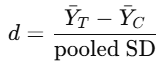

This is the raw standardized mean difference between groups, ignoring covariates.

**What Power using Cohen's d represents:**

Power of a simple two-sample t-test comparing treatment vs control.

Uses a Cohen’s d computed from raw group means and pooled SD (or otherwise precomputed).

<br>

This assumes:

- no regression adjustment

- no baseline covariates

- equal variance framework of classical t-test

<br>

So this answers:

- How much power would a simple difference-in-means test have had?

<br>

**When to calculate power using Cohen's d?:**

Use this when your analysis will be a plain two-sample t-test (no covariates will be used), or when you only have an unadjusted effect-size estimate to plan with.

If ANCOVA would be used in your analysis but you use unadjusted d here, you will under- or over-estimate power depending on whether covariates would reduce residual variance.


<br>

**What ANCOVA-based power represents:**

Power of the treatment effect conditional on covariate adjustment, matching the model you actually estimated.


ANCOVA removes variance explained by covariates → residual variance is smaller → precision is higher.

<br>

**ANCOVA adjusted effect size:**

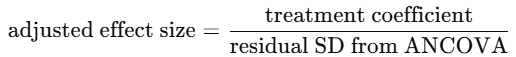

Then you compute power using that adjusted effect.

<br>

**Preferred:** the ANCOVA-adjusted approach is preferred if you plan to analyze the data with ANCOVA / regression adjusting for the same covariates. It reflects the adjusted effect and the (usually reduced) residual variance, so the power estimate is aligned with the planned analysis.











In [39]:
# ==================================================
# STEP 8 — CALCULATE THE ANCOVA-ADJUSTED STANDARDIZED EFFECT & POWER
# ==================================================

import numpy as np
from statsmodels.stats.power import TTestIndPower

# ANCOVA model already estimated as: ancova

beta_treat = ancova.params["treatment_indicator"]
resid_sd = np.sqrt(ancova.mse_resid)

effect_size_adj = beta_treat / resid_sd

print("Adjusted standardized effect =", effect_size_adj)

power_adj = TTestIndPower().solve_power(
    effect_size=effect_size_adj,
    nobs1=185,
    ratio=260/185, # control group size / treatment group size
    alpha=0.05
)

print("Power of ANCOVA-adjusted effect =", power_adj)

Adjusted standardized effect = 0.26993798318416534
Power of ANCOVA-adjusted effect = 0.799656649204108


**Meaning of Power:**

Power is the probability of detecting a real effect of this size if it truly exists.

This study had about:
- ~80% probability of detecting the observed effect

<br>

**Is this good?:**
Standard research convention:
- 80% power = acceptable minimum
- 90% = strong
- 95% = very strong

So, this study meets standard power recommendations. The study had adequate statistical power (~ 80%) to detect an effect of the observed magnitude.

**Monte Carlo ANCOVA power simulation:**

To be more accurate in our power estimate, we can do the following Monte Carlo simulation:

In [49]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# -------------------------------
# SETTINGS
# -------------------------------
n_treat = 185
n_control = 260
alpha = 0.05
n_sim = 10000   # increase for precision

# -------------------------------
# EXTRACT PARAMETERS FROM FITTED ANCOVA
# -------------------------------
params = ancova.params

intercept = params["Intercept"]
beta_treat = params["treatment_indicator"]

# all other covariates (exclude intercept + treatment)
beta_cov = params.drop(["Intercept", "treatment_indicator"])

sigma = np.sqrt(ancova.mse_resid)

# -------------------------------
# SIMULATE ONE DATASET
# -------------------------------
def simulate_dataset():
    
    n = n_treat + n_control
    
    df = pd.DataFrame({
        "treatment_indicator": np.r_[np.ones(n_treat), np.zeros(n_control)],
        "age": np.random.normal(30, 10, n),
        "education": np.random.normal(12, 2, n),
        "Black": np.random.binomial(1, 0.3, n),
        "Hispanic": np.random.binomial(1, 0.2, n),
        "married": np.random.binomial(1, 0.5, n),
        "nodegree": np.random.binomial(1, 0.4, n),
        "RE74": np.random.normal(20000, 10000, n),
        "RE75": np.random.normal(21000, 10000, n),
    })
    
    # generate outcome
    y = (
        intercept
        + beta_treat * df["treatment_indicator"]
        + df[beta_cov.index] @ beta_cov
        + np.random.normal(0, sigma, n)
    )
    
    df["RE78"] = y
    return df

# -------------------------------
# RUN MONTE CARLO
# -------------------------------
reject_count = 0

for _ in range(n_sim):
    
    sim_df = simulate_dataset()
    
    model = smf.ols(
        "RE78 ~ treatment_indicator + age + education + Black + Hispanic + married + nodegree + RE74 + RE75",
        data=sim_df
    ).fit()
    
    if model.pvalues["treatment_indicator"] < alpha:
        reject_count += 1

power_mc = reject_count / n_sim
print("Monte Carlo ANCOVA power =", power_mc)


Monte Carlo ANCOVA power = 0.7938


This suggests the mean ANCOVA-derived power is 0.7938. Although 0.7938 is statistically indistinguishable from 0.80 for practical purposes, deriving the confidence interval with α = 0.05 using 10,000 simulations shows that 0.80 falls within that interval:

SE ≈ √(0.7938×0.2062 / 10,000)

SE ≈ 0.0040

0.7938 ± 1.96 × 0.0040

(0.7859, 0.8017)